# Preliminaries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [20]:
df = pd.read_csv('C:\\Users\\berna\\Documents\\Eskwelabs\\Capstone Project\\consolidated_csv_03TIWI_A.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

## Dropping of columns

In [21]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [22]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df.head()

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

## Filling NaNs

In [24]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

result_df.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0


## Filter to 2023 Data

In [25]:
result_df['run_time'] = pd.to_datetime(result_df['run_time'], format="%m/%d/%Y %H:%M:%S %p", errors = 'coerce')

C:\Users\berna\AppData\Local\Temp\ipykernel_17996\1835035194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = pd.to_datetime(result_df['run_time'], format="%m/%d/%Y %H:%M:%S %p", errors = 'coerce')


In [147]:
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,NaT,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,2021-06-26 12:10:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2021-06-26 12:15:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,2021-06-26 12:20:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233792,2023-09-25 11:35:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233793,2023-09-25 11:40:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233794,2023-09-25 11:45:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
233795,2023-09-25 11:50:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [52]:
# result_df[result_df['run_time'].isnull()]

# # Get the indices of rows with null values
# null_indices = result_df[result_df['run_time'].isnull()].index

# # Create a list of indices including the rows above and below null values
# neighbor_indices = list(set(null_indices) | set(null_indices - 1) | set(null_indices + 1))
# neighbor_indices = [index for index in neighbor_indices if 0 <= index < len(df)]

# # Use these indices to select the desired rows from the DataFrame
# checking_df = result_df.loc[neighbor_indices]
# checking_df.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,NaT,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
8199,2021-08-23 11:55:00,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
8200,NaT,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
8201,2021-08-24 12:05:00,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0


In [10]:
# Forward-fill missing values with the next cell's date (excluding time)
result_df['run_time'] = result_df['run_time'].fillna(result_df['run_time'].shift(-1))
result_df.head()

C:\Users\berna\AppData\Local\Temp\ipykernel_17996\31808556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = result_df['run_time'].fillna(result_df['run_time'].shift(-1))


,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,2021-06-26 12:10:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2021-06-26 12:15:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,2021-06-26 12:20:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0


In [30]:
df_2023 = result_df[result_df['run_time'].dt.year == 2023]
df_2023.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
157483,2023-01-01 12:05:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
157484,2023-01-01 12:10:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
157485,2023-01-01 12:15:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
157486,2023-01-01 12:20:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
157487,2023-01-01 12:25:00,-10000.0,-10000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


## Normalize Quantity Values

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Extract only the quantity columns for normalization
quantity_columns = [f'quantity{i}' for i in range(1, 12)]

# Flatten the DataFrame and extract only quantity columns
flattened_quantities = df_2023[quantity_columns].values.flatten()

# Reshape the flattened quantities to a column vector
flattened_quantities = flattened_quantities.reshape(-1, 1)

# Use MinMaxScaler on the flattened quantities
scaler = MinMaxScaler()
scaled_quantities = scaler.fit_transform(flattened_quantities)

# Reshape the scaled quantities to match the original DataFrame shape
scaled_quantities = scaled_quantities.reshape(df_2023[quantity_columns].shape)

# Update the DataFrame with the scaled values
df_2023.loc[:, quantity_columns] = scaled_quantities

## Getting the max capacity per bidding interval

In [32]:
final_df = df_2023[['run_time', 'quantity11']]
final_df.head()

,run_time,quantity11
157483,2023-01-01 12:05:00,0.625
157484,2023-01-01 12:10:00,0.625
157485,2023-01-01 12:15:00,0.625
157486,2023-01-01 12:20:00,0.625
157487,2023-01-01 12:25:00,0.625


## Prepared dataset

In [33]:
final_df = final_df.rename(columns={'quantity11':'max_quantity'})
# final_df.index = pd.MultiIndex.from_arrays([final_df.index.date, final_df.index.time], names=['date', 'time'])
final_df.set_index('run_time', inplace=True)
final_df.head()

,max_quantity
run_time,
2023-01-01 12:05:00,0.625
2023-01-01 12:10:00,0.625
2023-01-01 12:15:00,0.625
2023-01-01 12:20:00,0.625
2023-01-01 12:25:00,0.625


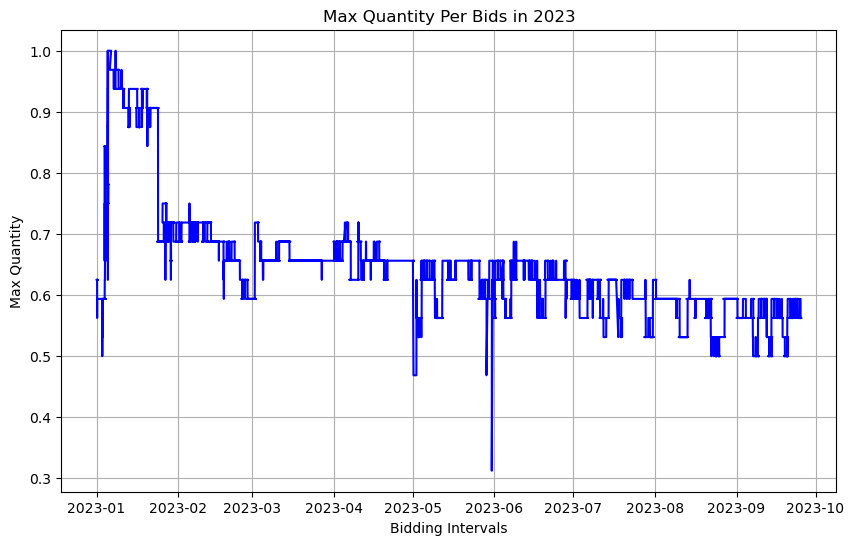

In [148]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df['max_quantity'], linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2023')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

## Trying JC's suggestions

### Daily aggregation

In [40]:
# Resample by day and calculate mean for 'max_quantity'
final_df_daily = final_df['max_quantity'].resample('D').mean()
final_df_daily.head()

run_time
2023-01-01    0.615636
2023-01-02    0.593750
2023-01-03    0.589286
2023-01-04    0.711128
2023-01-05    0.799216
Freq: D, Name: max_quantity, dtype: float64

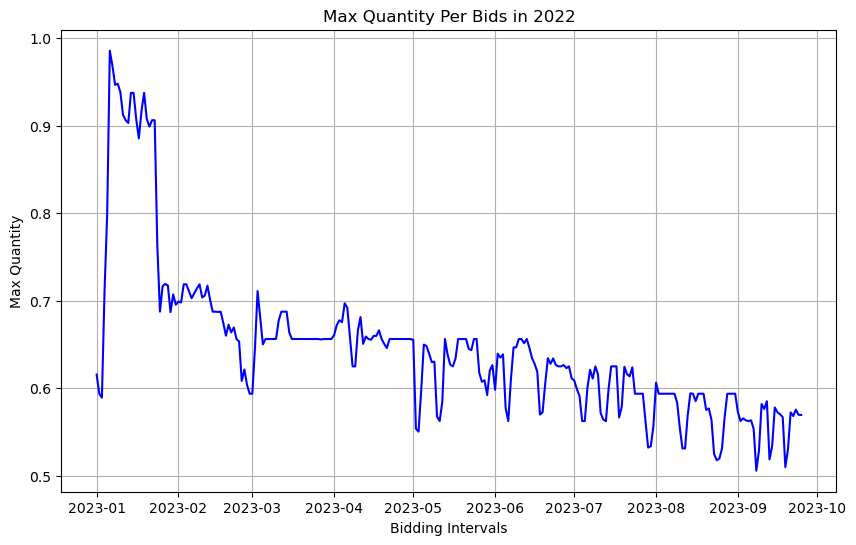

In [41]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df_daily, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2022')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

### Weekly aggregation

In [37]:
# Resample by week and calculate mean for 'max_quantity'
final_df_weekly = final_df['max_quantity'].resample('W-Mon').mean()
final_df_weekly.head()

run_time
2023-01-02    0.604693
2023-01-09    0.849708
2023-01-16    0.920343
2023-01-23    0.908397
2023-01-30    0.713959
Freq: W-MON, Name: max_quantity, dtype: float64

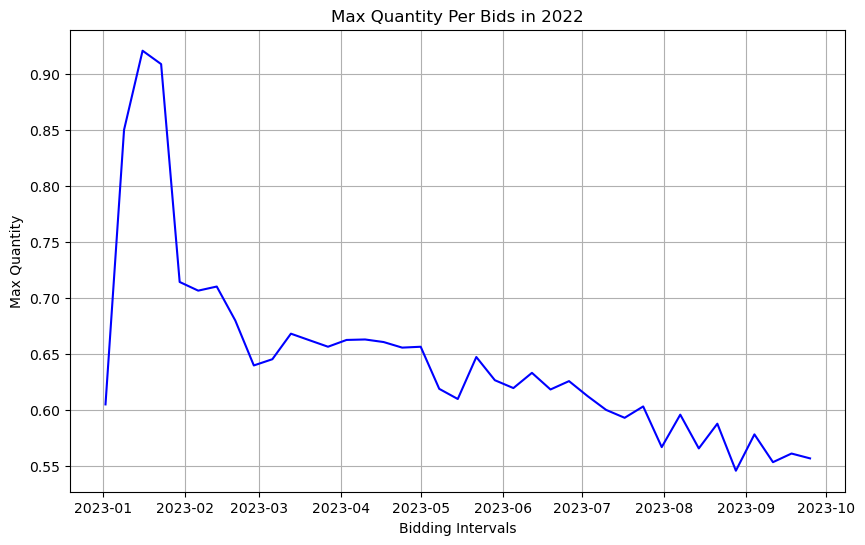

In [39]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df_weekly, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2022')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

### Forecast windows

In [49]:
# Resampling the last months of 2023
final_df_last = final_df[(final_df.index.month == 8) | (final_df.index.month == 9) | (final_df.index.month == 10)]
final_df_last.head()

,max_quantity
run_time,
2023-08-01 12:05:00,0.625
2023-08-01 12:10:00,0.625
2023-08-01 12:15:00,0.625
2023-08-01 12:20:00,0.625
2023-08-01 12:25:00,0.625


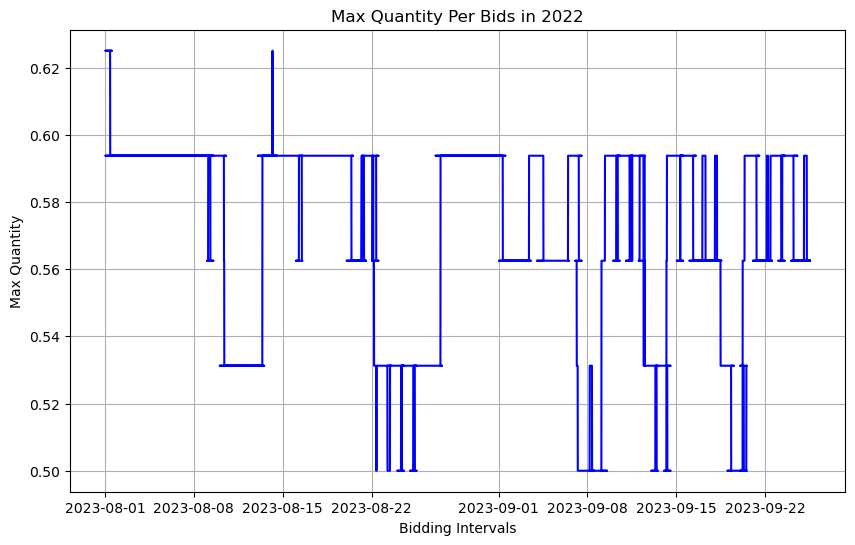

In [52]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df_last, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2022')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

In [53]:
# Resample by day and calculate mean for 'max_quantity'
final_df_daily_last = final_df_last['max_quantity'].resample('D').mean()
final_df_daily_last.head()

run_time
2023-08-01    0.606381
2023-08-02    0.593750
2023-08-03    0.593750
2023-08-04    0.593750
2023-08-05    0.593750
Freq: D, Name: max_quantity, dtype: float64

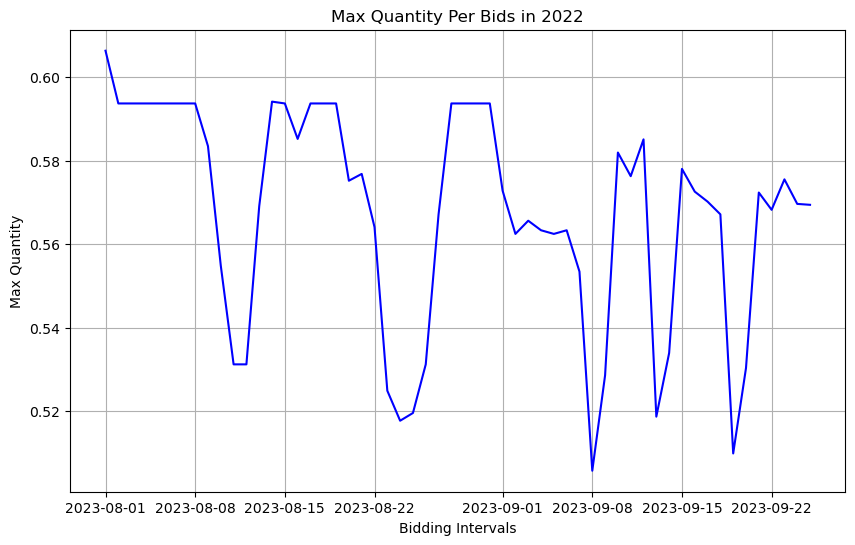

In [54]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df_daily_last, linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2022')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

### Final datasets for analysis

In [ ]:
# The final datasets to be investiagted:

# Daily aggregation: final_df_daily
# Weekly aggregation: final_df_weekly
# Forcast window, daily aggregation: final_df_daily_last

# TSL Decomposition, Stationarity Test, and ACF Plots 

## Daily aggregation

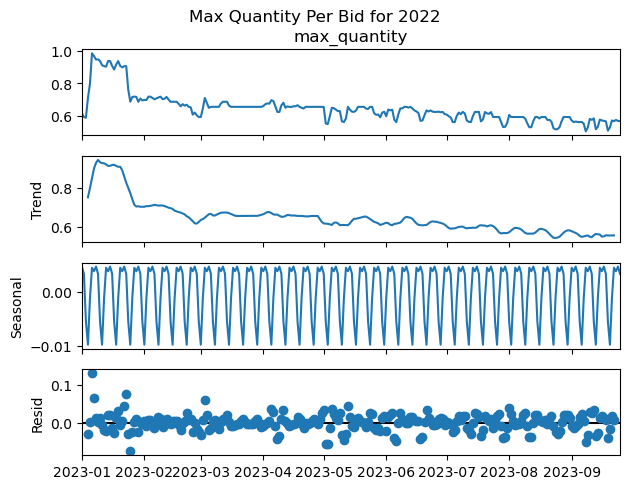

In [59]:
# Perform seasonal decomposition
res = sm.tsa.seasonal_decompose(final_df_daily)
resplot = res.plot()
plt.suptitle("Max Quantity Per Bid for 2022", y=1.01)

plt.show()

In [60]:
def adf_test(data):
    adf_test = adfuller(data)
    adf_result = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','N Lags Used',\
                                                'N Observations Used'])
    for key,value in adf_test[4].items():
            adf_result['Critical Value (%s)'%key] = value

    return adf_result

In [62]:
adf_test(final_df_daily.diff()[1:])

Test Statistic         -1.121094e+01
p-value                 2.126369e-20
N Lags Used             2.000000e+00
N Observations Used     2.640000e+02
Critical Value (1%)    -3.455365e+00
Critical Value (5%)    -2.872551e+00
Critical Value (10%)   -2.572638e+00
dtype: float64

In [ ]:
# final_df_daily passed the test and is therefore stationary

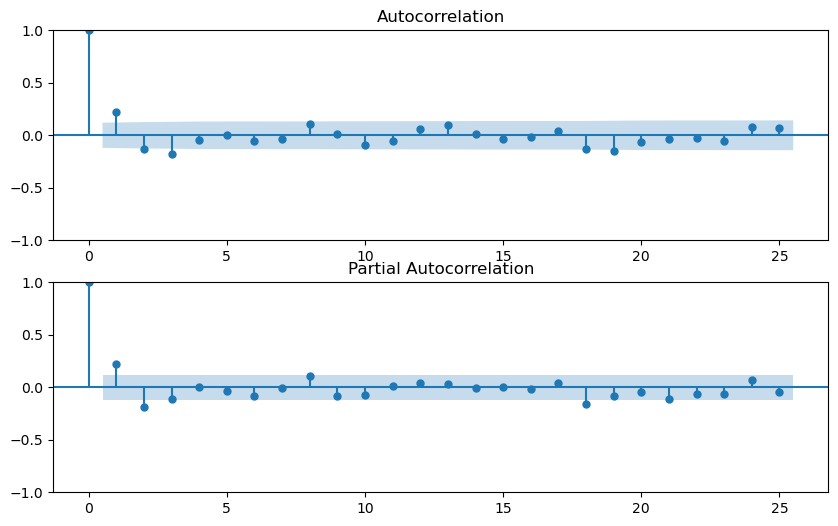

In [84]:
fig,axs = plt.subplots(2,1,figsize=(10,6))
acf = plot_acf(final_df_daily.diff()[1:], ax=axs[0])
pacf = plot_pacf(final_df_daily.diff()[1:], ax=axs[1])

In [ ]:
# ACF correlated lags: 1, 2, 3, 18, 19
# PCF correlated lags: 1, 2, 18

# Forecasting

In [100]:
#split dataset to training and test sets
train_df_daily = final_df_daily['2023-01-01':'2023-06-30']
test_df_daily = final_df_daily['2023-07-01':'2023-09-25']

Text(0, 0.5, 'Streams x 100K')

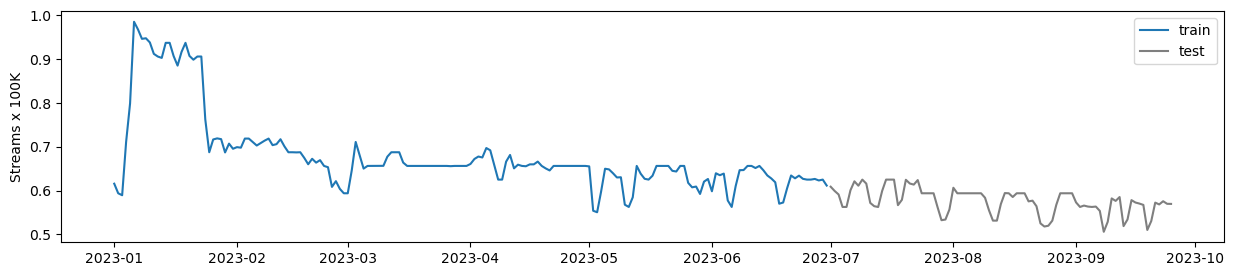

In [101]:
# Plot the training and testing period
fig = plt.figure(figsize=(15,3))
plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.legend()
plt.ylabel("Streams x 100K")

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

## Windowed Average Approach

In [152]:
# Set window to 7 days
WINDOW = 7
forecast_df = final_df_daily.rolling(WINDOW).mean().shift(1)['2023-07-01':'2023-09-25']
forecast_df

run_time
2023-07-01    0.623242
2023-07-02    0.620676
2023-07-03    0.616974
2023-07-04    0.612120
2023-07-05    0.602974
                ...   
2023-09-21    0.551767
2023-09-22    0.557258
2023-09-23    0.555858
2023-09-24    0.556278
2023-09-25    0.556200
Freq: D, Name: max_quantity, Length: 87, dtype: float64

Text(0, 0.5, 'Streams x 100K')

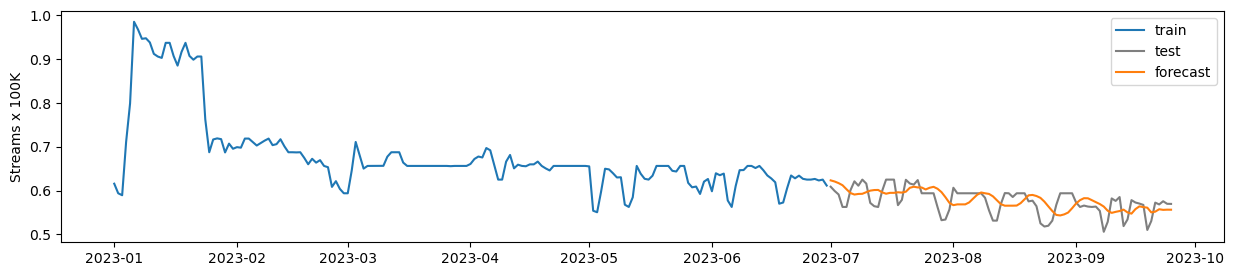

In [153]:
# plot the forecast
fig = plt.figure(figsize=(15,3))
plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("Streams x 100K")

In [154]:
show_errors(test_df_daily,forecast_df)

,RMSE,MAE,MAPE
0,0.02928,0.025168,4.436332


## Exponential Average Approach

In [157]:
# Set alpha to 0.7, i.e. 70% of the forecast will come from the most recent data point
ALPHA = 0.70
forecast_df = final_df_daily.ewm(alpha=ALPHA).mean().shift(1)['2023-07-01':'2023-09-25']

Text(0, 0.5, 'Streams x 100K')

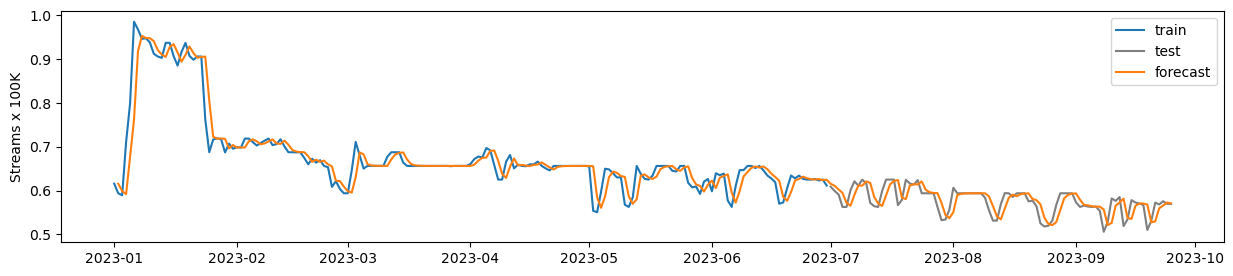

In [112]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))
plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("Streams x 100K")

In [158]:
show_errors(test_df_daily,forecast_df)

,RMSE,MAE,MAPE
0,0.024118,0.016855,2.970375


## Trend and Seasonality Approach

In [113]:
from statsmodels.tsa.api import ExponentialSmoothing

In [115]:
# specify fit for weekly (d=7) seasonal cycles
# assume additive combinations of component
model_fit = ExponentialSmoothing(train_df_daily,seasonal_periods=7 ,trend='add', seasonal='add').fit()
forecast_df = pd.DataFrame(model_fit.forecast(len(test_df_daily)).values, index=test_df_daily.index)

Text(0, 0.5, 'Streams x 100K')

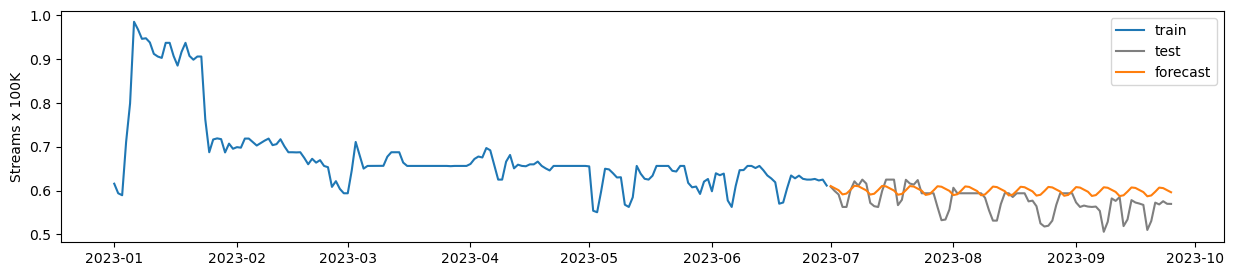

In [116]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("Streams x 100K")

In [119]:
show_errors(test_df_daily,forecast_df)

,RMSE,MAE,MAPE
0,0.03722,0.028057,5.346594


## Stochastic Approach (ARIMA)

In [122]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [217]:
model = ARIMA(train_df_daily, order=(1, 0, 1)) #try other arguments for order
model_fit = model.fit()
train_fit_df = pd.DataFrame(model_fit.fittedvalues)

Text(0, 0.5, 'XXXX')

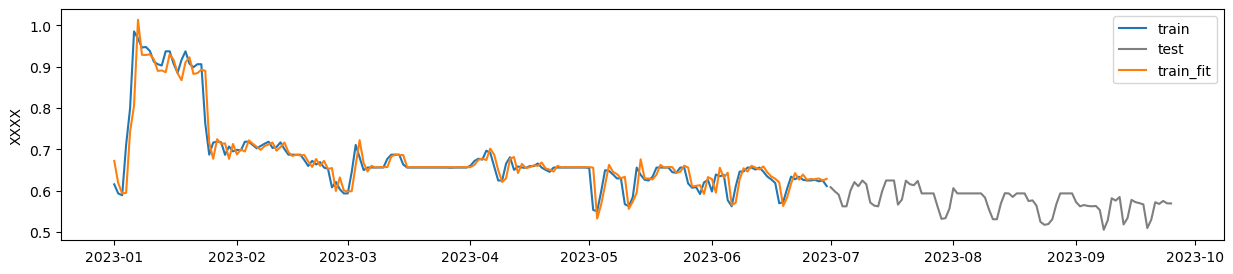

In [218]:
#plot the fitted training data
fig = plt.figure(figsize=(15,3))

plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(train_fit_df, color='C1', label='train_fit')
plt.legend()
plt.ylabel("XXXX")

In [219]:
#dynamic = True toggles use of preceding forecast value with the model fit values to get the next forecast value
forecast_df = pd.DataFrame(model_fit.forecast(len(test_df_daily),dynamic=True).values, index=test_df_daily.index)

Text(0, 0.5, 'XXXX')

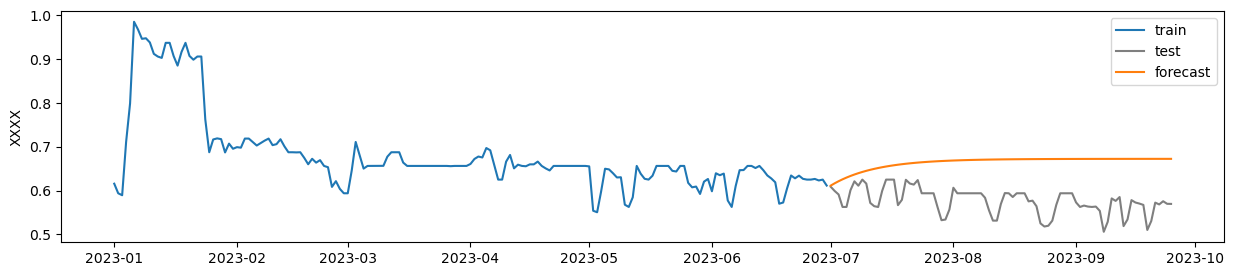

In [220]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("XXXX")

In [221]:
show_errors(test_df_daily,forecast_df)

,RMSE,MAE,MAPE
0,0.095085,0.08777,15.536739


## Neural Network Approach

In [144]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/69/ab/1a5589bc09f933b1ee68e49849af78f892dec4459278885a5fb2b06c1a3a/holidays-0.38-py3-none-any.whl.metadata
  Using cached holidays-0.38-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/pack

In [207]:
from prophet import Prophet

In [208]:
# Create Prophet model
model = Prophet()

# Rename the columns to fit Prophet's requirements
input_df = train_df_daily.copy().reset_index()
input_df = input_df.rename(columns={'run_time': 'ds', 'max_quantity': 'y'})

# Fit model to data
model.fit(input_df)

14:15:10 - cmdstanpy - INFO - Chain [1] start processing
14:15:10 - cmdstanpy - INFO - Chain [1] done processing


In [210]:
# Generate future predictions
future = model.make_future_dataframe(periods=87)

# Make predictions
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,0.852540,0.775468,0.926594,0.852540,0.852540,-0.000427,-0.000427,-0.000427,-0.000427,-0.000427,-0.000427,0.0,0.0,0.0,0.852113
1,2023-01-02,0.849694,0.772276,0.919218,0.849694,0.849694,-0.003737,-0.003737,-0.003737,-0.003737,-0.003737,-0.003737,0.0,0.0,0.0,0.845956
2,2023-01-03,0.846847,0.760846,0.905757,0.846847,0.846847,-0.011990,-0.011990,-0.011990,-0.011990,-0.011990,-0.011990,0.0,0.0,0.0,0.834858
3,2023-01-04,0.844001,0.762015,0.908384,0.844001,0.844001,-0.008809,-0.008809,-0.008809,-0.008809,-0.008809,-0.008809,0.0,0.0,0.0,0.835192
4,2023-01-05,0.841155,0.774121,0.914153,0.841155,0.841155,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.0,0.0,0.0,0.842068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2023-09-21,0.575092,0.488020,0.657022,0.533950,0.613838,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.0,0.0,0.0,0.576005
264,2023-09-22,0.574636,0.498886,0.670622,0.532795,0.613919,0.011617,0.011617,0.011617,0.011617,0.011617,0.011617,0.0,0.0,0.0,0.586254
265,2023-09-23,0.574181,0.501051,0.672743,0.531587,0.613971,0.012432,0.012432,0.012432,0.012432,0.012432,0.012432,0.0,0.0,0.0,0.586613
266,2023-09-24,0.573725,0.486603,0.656256,0.530640,0.614368,-0.000427,-0.000427,-0.000427,-0.000427,-0.000427,-0.000427,0.0,0.0,0.0,0.573298


In [212]:
forecast_df = forecast[['ds','yhat']].rename(columns={'ds':'date','yhat1':'streams'}).set_index('date')
forecast_df

,yhat
date,
2023-01-01,0.852113
2023-01-02,0.845956
2023-01-03,0.834858
2023-01-04,0.835192
2023-01-05,0.842068
...,...
2023-09-21,0.576005
2023-09-22,0.586254
2023-09-23,0.586613


Text(0, 0.5, 'XXX')

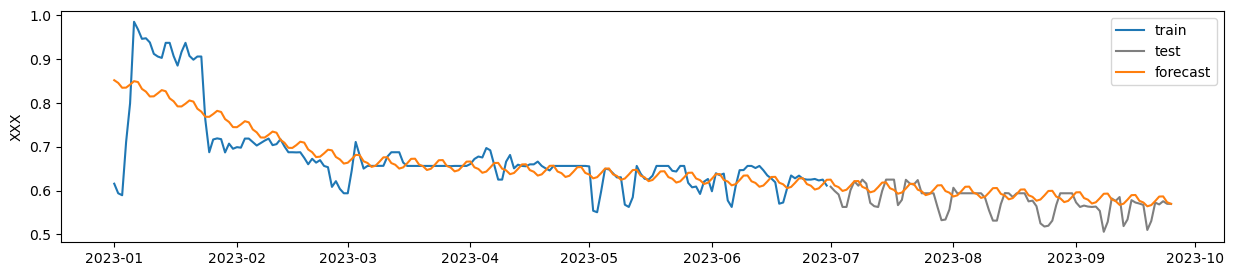

In [213]:
# plot the forecast results
fig = plt.figure(figsize=(15,3))

plt.plot(train_df_daily, color='C0', label='train')
plt.plot(test_df_daily, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
plt.legend()
plt.ylabel("XXX")

In [216]:
show_errors(test_df_daily,forecast_df['2023-07-01':])

,RMSE,MAE,MAPE
0,0.031493,0.022615,5.069005


# Final approach

In [222]:
# Drop columns
# Fill NaNs
# Filter to 2023 data
# Normalize quantity values
# Get max capacity per bidding interval
# Daily aggregation
# TSL decomposition
# Stationary test
# Neural netrok approach